In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compute_correlation_matrix(csv_paths, merge_on, cols_of_interest, lang="", plot_heatmap=True, print_correlation=False):
    """
    Computes and optionally visualizes the correlation matrix of selected metrics 
    from multiple CSV files merged on a common column.

    Args:
        csv_paths (dict): A dictionary of CSV file paths with keys representing names 
                          and values as file paths, e.g., 
                          {'bert': 'path/to/bert.csv', 'bleu': 'path/to/bleu.csv', ...}.
        merge_on (str): Column name to merge the dataframes on.
        cols_of_interest (list): List of columns to include in the correlation matrix.
        plot_heatmap (bool): Whether to plot a heatmap of the correlation matrix.

    Returns:
        pd.DataFrame: Correlation matrix of the selected columns.
    """
    # Load and merge all CSV files on the specified column
    merged_df = None
    for name, path in csv_paths.items():
        df = pd.read_csv(path)
        if merged_df is None:
            merged_df = df
        else:
            merged_df = merged_df.merge(df, on=merge_on)

    # Filter the merged DataFrame to only include columns of interest
    df_metrics = merged_df[cols_of_interest]

    # Compute the correlation matrix
    corr_matrix = df_metrics.corr()
    if print_correlation:
        print("Correlation matrix:")
        print(corr_matrix)

    # Optionally, plot the heatmap
    if plot_heatmap:
        # make it bigger
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=False)
        plt.title(f"Correlation Matrix Heatmap {lang}")
        plt.show()

    return corr_matrix

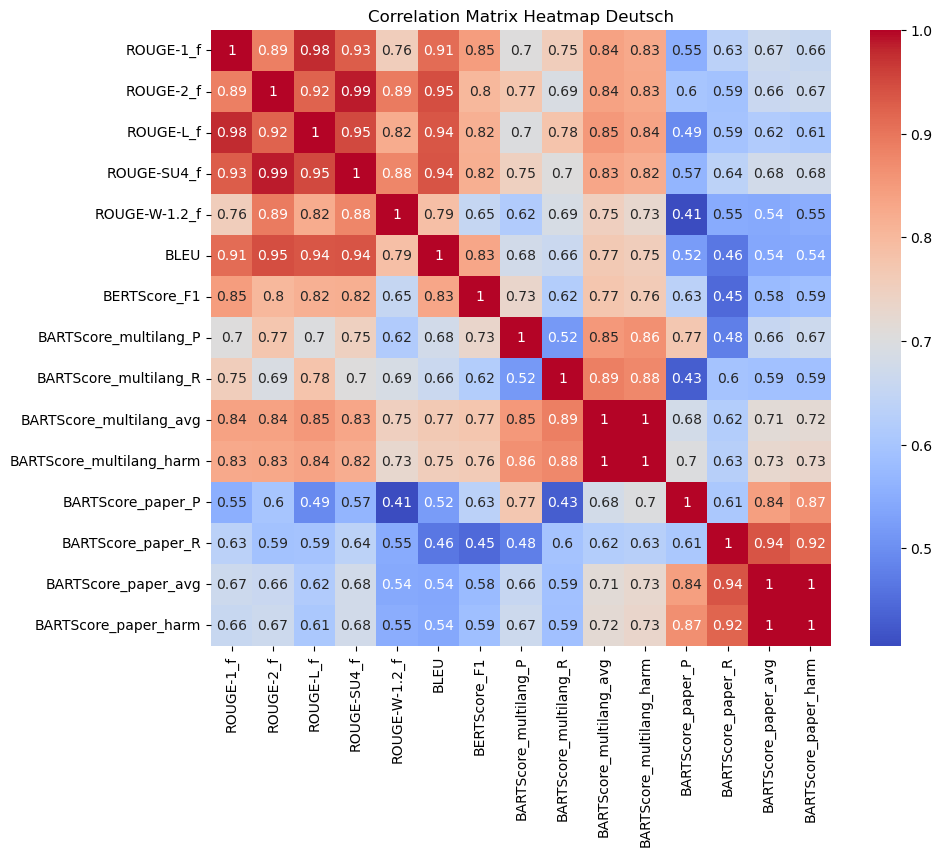

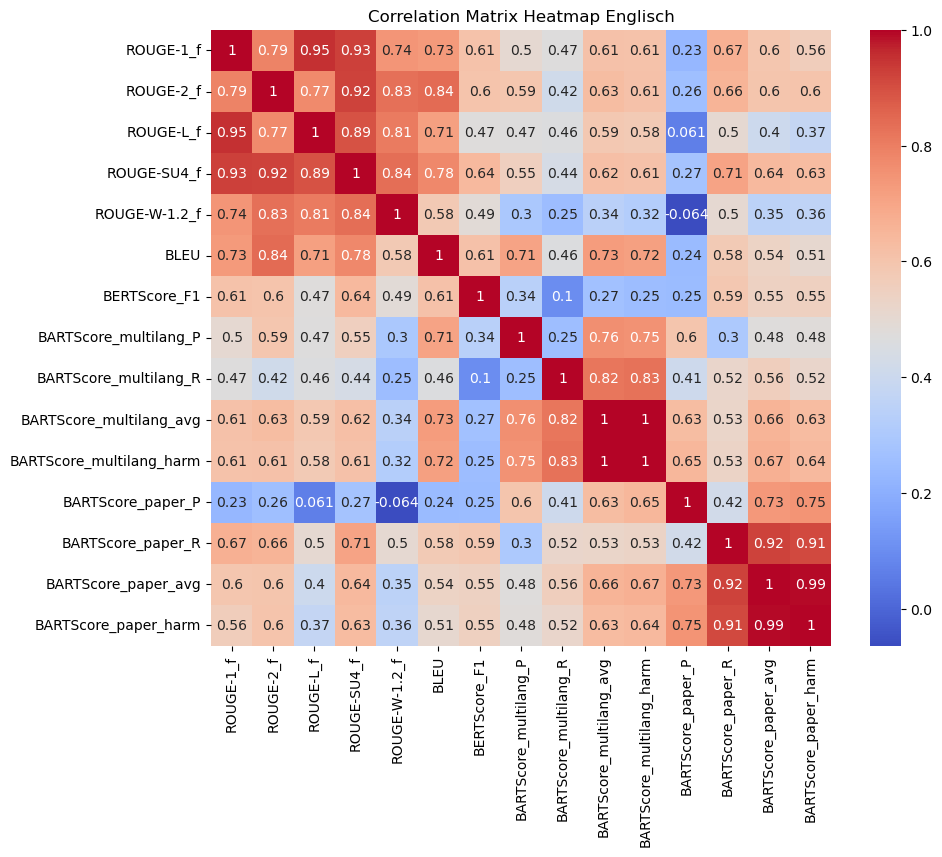

In [8]:
# Define the paths to your CSV files
csv_paths_de = {
    'bert': 'data/eval/bertscore_evaluation_de.csv',
    'bleu': 'data/eval/bleu_sentence_evaluation_de.csv',
    'rouge': 'data/eval/rouge_evaluation_de.csv',
    'bart_paper': 'data/eval/bartscore_de_cnn.csv',
    'bart_multi': 'data/eval/bartscore_de_multi.csv',
}
csv_paths_en = {
    'bert': 'data/eval/bertscore_evaluation_en.csv',
    'bleu': 'data/eval/bleu_sentence_evaluation_en.csv',
    'rouge': 'data/eval/rouge_evaluation_en.csv',
    'bart_paper': 'data/eval/bartscore_en_cnn.csv',
    'bart_multi': 'data/eval/bartscore_en_multi.csv',
}

# Define the column to merge on and the columns of interest
merge_on = 'question_id_q'
cols_of_interest = [
    'ROUGE-1_f',
    'ROUGE-2_f',
    'ROUGE-L_f',
    'ROUGE-SU4_f',
    'ROUGE-W-1.2_f',
    'BLEU',
    'BERTScore_F1',
    'BARTScore_multilang_P',
    'BARTScore_multilang_R',
    'BARTScore_multilang_avg',
    'BARTScore_multilang_harm',
    'BARTScore_paper_P',
    'BARTScore_paper_R',
    'BARTScore_paper_avg',
    'BARTScore_paper_harm'
]

# Call the function to compute the correlation matrix and plot the heatmap
corr_matrix = compute_correlation_matrix(
    csv_paths=csv_paths_de,
    merge_on=merge_on,
    cols_of_interest=cols_of_interest,
    lang="Deutsch"
)
# Call the function to compute the correlation matrix and plot the heatmap
corr_matrix = compute_correlation_matrix(
    csv_paths=csv_paths_en,
    merge_on=merge_on,
    cols_of_interest=cols_of_interest,
    lang="Englisch"
)


C:\Users\wurch\AppData\Local\Temp\ipykernel_21252\2369946820.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Metric', y=value_col, palette='Set2')


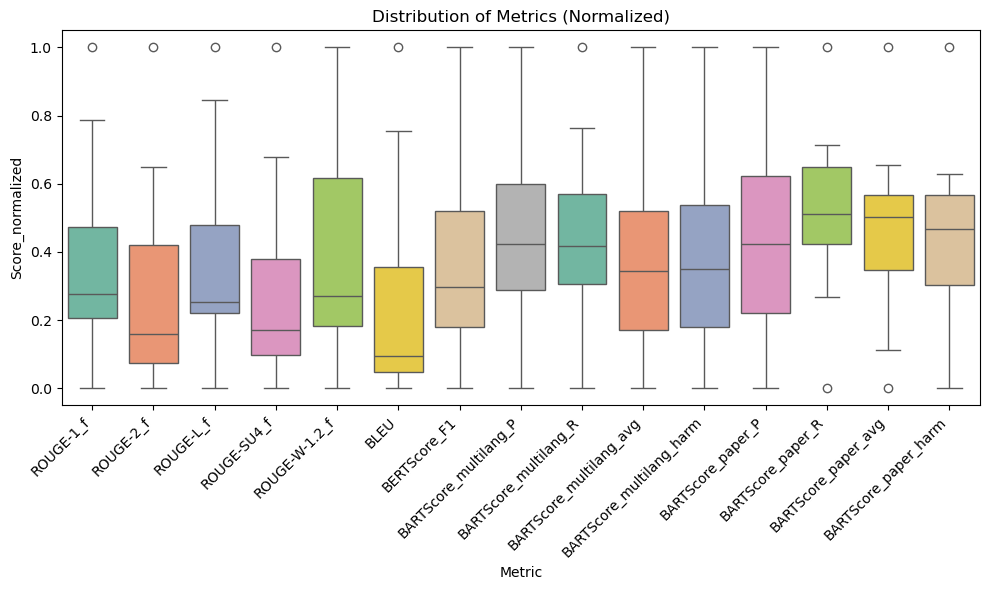

C:\Users\wurch\AppData\Local\Temp\ipykernel_21252\2369946820.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Metric', y=value_col, palette='Set2')


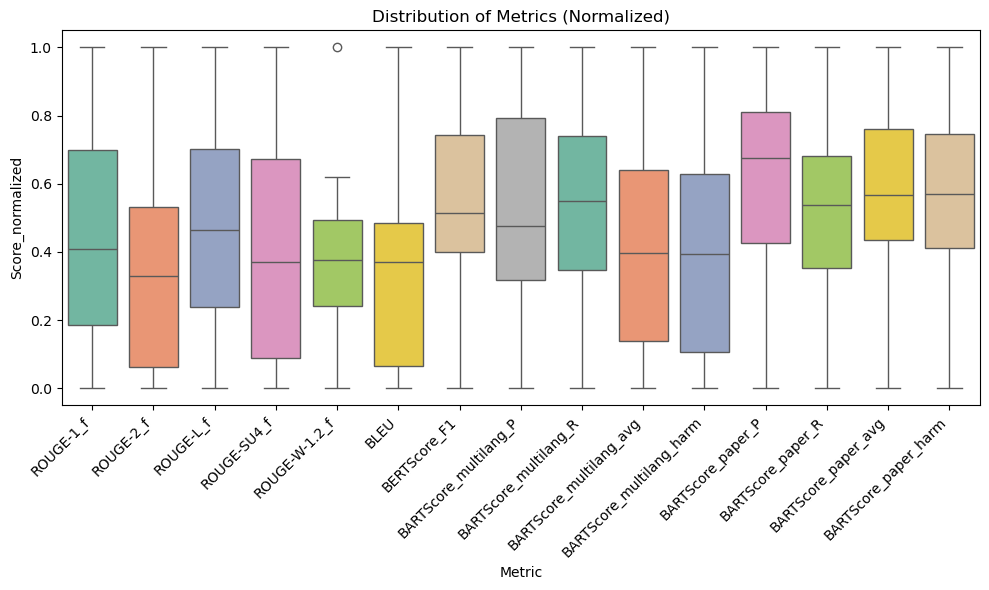

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_all_metrics_normalized(
    csv_paths,
    merge_on='question_id_q',
    save_fig=False,
    fig_filename='metrics_boxplot.png',
    normalize=True
):
    """
    Reads multiple CSVs, merges them into one DataFrame, then plots a grid of
    boxplots (or violin plots) showing the distribution of each metric
    across all rows. Optionally normalizes each metric via MinMax scaling.

    Args:
        csv_paths (dict): Keys are metric names, values are paths to CSV files.
        merge_on (str): Column to merge on (e.g., 'question_id_q').
        save_fig (bool): Whether to save the figure to disk.
        fig_filename (str): If save_fig=True, save the figure with this filename.
        normalize (bool): Whether to apply MinMax normalization to each metric.
    """

    merged_df = None
    # 1) Load & merge all CSVs
    for name, path in csv_paths.items():
        df = pd.read_csv(path)
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on=merge_on)

    # 2) Choose which columns to plot (adjust as needed)
    # Example: searching for columns that contain typical metric substrings
    all_cols = merged_df.columns
    #metric_cols = [c for c in all_cols if any(m in c.lower() for m in ['bleu', 'rouge', 'bert', 'bart', 'f1'])]
    metric_cols = [
        'ROUGE-1_f',
        'ROUGE-2_f',
        'ROUGE-L_f',
        'ROUGE-SU4_f',
        'ROUGE-W-1.2_f',
        'BLEU',
        'BERTScore_F1',
        'BARTScore_multilang_P',
        'BARTScore_multilang_R',
        'BARTScore_multilang_avg',
        'BARTScore_multilang_harm',
        'BARTScore_paper_P',
        'BARTScore_paper_R',
        'BARTScore_paper_avg',
        'BARTScore_paper_harm'
    ]

    # 3) "Melt" to a long format for plotting
    plot_df = merged_df.melt(
        id_vars=[merge_on], 
        value_vars=metric_cols,
        var_name='Metric', 
        value_name='Score'
    )

    # 4) Optional: Normalize each Metric by MinMax scaling
    if normalize:
        # We'll do the scaling separately per metric
        plot_df['Score_normalized'] = plot_df.groupby('Metric')['Score'].transform(
            lambda x: (x - x.min()) / (x.max() - x.min()) if (x.max() != x.min()) else 0
        )
        value_col = 'Score_normalized'
    else:
        value_col = 'Score'

    # 5) Create a grid of boxplots (or violin plots)
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plot_df, x='Metric', y=value_col, palette='Set2')
    # For violin: sns.violinplot(data=plot_df, x='Metric', y=value_col, palette='Set2')
    plt.title('Distribution of Metrics (Normalized)' if normalize else 'Distribution of Metrics')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    if save_fig:
        plt.savefig(fig_filename, dpi=150)
    plt.show()

# EXAMPLE USAGE:
csv_paths_de = {
    'bert': 'data/eval/bertscore_evaluation_de.csv',
    'bleu': 'data/eval/bleu_sentence_evaluation_de.csv',
    'rouge': 'data/eval/rouge_evaluation_de.csv',
    'bart_paper': 'data/eval/bartscore_de_cnn.csv',
    'bart_multi': 'data/eval/bartscore_de_multi.csv',
}

visualize_all_metrics_normalized(
    csv_paths_de,
    merge_on='question_id_q',
    save_fig=False,
    normalize=True  # MinMax scaling
)

csv_paths_en = {
    'bert': 'data/eval/bertscore_evaluation_en.csv',
    'bleu': 'data/eval/bleu_sentence_evaluation_en.csv',
    'rouge': 'data/eval/rouge_evaluation_en.csv',
    'bart_paper': 'data/eval/bartscore_en_cnn.csv',
    'bart_multi': 'data/eval/bartscore_en_multi.csv',
}
visualize_all_metrics_normalized(
    csv_paths_en,
    merge_on='question_id_q',
    save_fig=False,
    normalize=True  # MinMax scaling
)


C:\Users\wurch\AppData\Local\Temp\ipykernel_21252\2899102812.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='value', y='metric', palette='Blues_d')


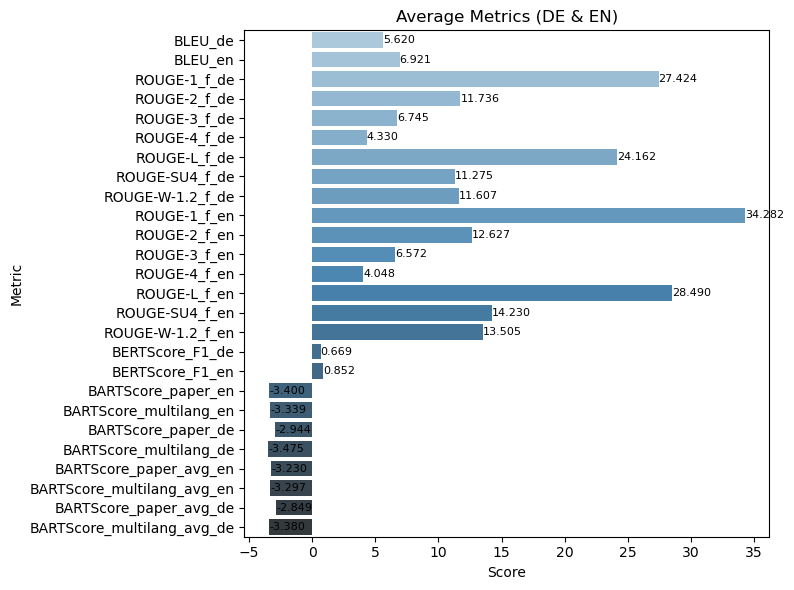

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_mean_scores(df_path, title='Mean Scores', save_fig=False, fig_filename='mean_scores.png'):
    """
    Loads a CSV with columns [metric, value] and plots a horizontal bar chart.
    """
    df = pd.read_csv(df_path)

    plt.figure(figsize=(8, 6))
    # If the data is large, you can sort descending, etc.
    #df_sorted = df.sort_values('value', ascending=False)
    
    sns.barplot(data=df, x='value', y='metric', palette='Blues_d')
    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Metric')

    # Optionally annotate each bar with its exact value
    for idx, row in df.iterrows():
        plt.text(
            row['value'], 
            idx, 
            f"{row['value']:.3f}", 
            va='center', 
            ha='left', 
            fontsize=8
        )

    plt.tight_layout()
    if save_fig:
        plt.savefig(fig_filename, dpi=150)
    plt.show()

# EXAMPLE USAGE
mean_scores_path = 'data/eval/mean_eval.csv'  # or wherever you store the "metric,value" data
visualize_mean_scores(mean_scores_path, title='Average Metrics (DE & EN)')


In [8]:
import pickle 
import pprint
# Load the model 
with open('data.pkl', 'rb') as file: 
    data = pickle.load(file) 

# show the pickle file in organized way
# Use pprint to display the data in an organized way
pprint.pprint(data)


{0: {'ref_summ': 'Anuradha Koirala and 425 young women and girls have been '
                 'sleeping outdoors because of aftershocks . Pushpa Basnet and '
                 '45 children she cares for were forced to evacuate their '
                 'residence . Seven other CNN Heroes and their organizations '
                 'now assisting in relief efforts .',
     'src': '( cnn ) two cnn heroes are among the earthquake survivors in '
            'kathmandu , nepal . And they are struggling in the aftermath . '
            'Anuradha koirala , who rescues victims of sex trafficking , has a '
            'rehabilitation center in kathmandu that is home to 425 young '
            'women and girls . While her primary facility seems structurally '
            'unharmed , all of the children have been sleeping outdoors '
            'because of aftershocks , followed by a second earthquake on may '
            '12 . The once-vibrant campus has gone from a place of safety and '
          